# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mouse = mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"])
print(mouse_study_df[unique_mouse])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
repeated_mouse_df = pd.DataFrame(mouse_study_df[unique_mouse])
repeated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_study_df = mouse_study_df.drop(mouse_study_df[mouse_study_df["Mouse ID"] == "g989"].index)
new_mouse_study_df = pd.DataFrame(new_mouse_study_df)
new_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = new_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistics_df = pd.DataFrame({
    "Tumor Volume Mean": mean,
    "Tumor Volume Median": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err": sem
})

statistics_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

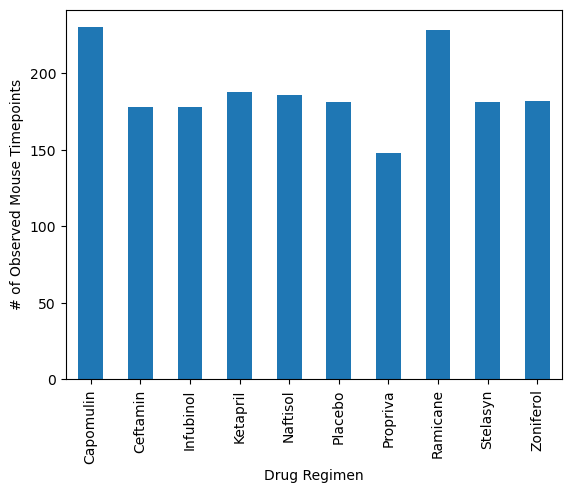

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
obs_group_df = new_mouse_study_df.groupby("Drug Regimen").size()
obs_group_df.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

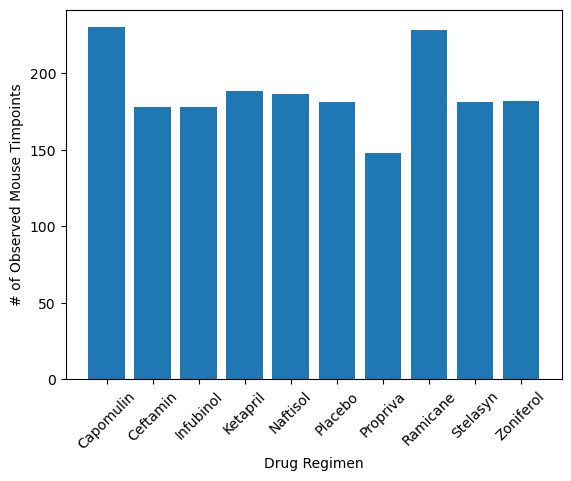

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(obs_group_df.index, obs_group_df)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

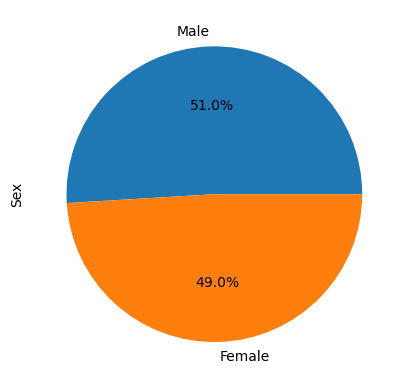

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group_df = new_mouse_study_df["Sex"].value_counts()
gender_group_df.plot(kind="pie", autopct='%1.1f%%')
plt.show

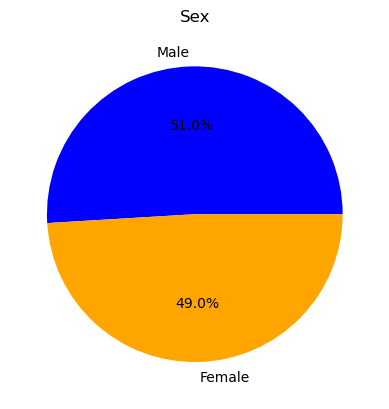

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group_df

labels = ["Male", "Female"]
number = [958, 922]
colors = ["blue", "orange"]

plt.pie(number, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = new_mouse_study_df[new_mouse_study_df['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume = filtered_df.groupby(['Mouse ID', "Drug Regimen"])['Tumor Volume (mm3)'].last()
final_tumor_volume = pd.DataFrame(final_tumor_volume)
final_tumor_volume

final_tumor_volume
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(new_mouse_study_df, final_tumor_volume, on='Mouse ID', how='left')
merged_df = merged_df.rename(columns={'Tumor Volume (mm3)_y': 'Final Tumor Volume (mm3)'})
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatments:
 tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Final Tumor Volume (mm3)']
 tumor_vol_data.append(tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
print(f"Treatment Regimen: {treatment}")
print(f"Number of Potential Outliers: {outliers.shape[0]}\n")

Treatment Regimen: Ceftamin
Number of Potential Outliers: 13



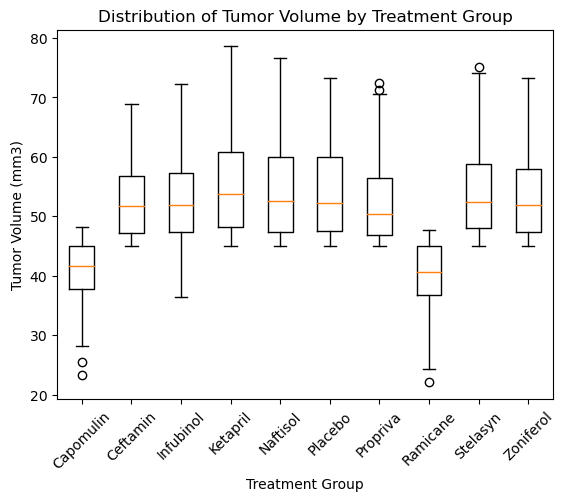

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
grouped_data = new_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
data = [grouped_data.get_group(regimen) for regimen in grouped_data.groups]
plt.boxplot(data)
plt.xticks(range(1, len(grouped_data.groups) + 1), grouped_data.groups.keys(), rotation=45)
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

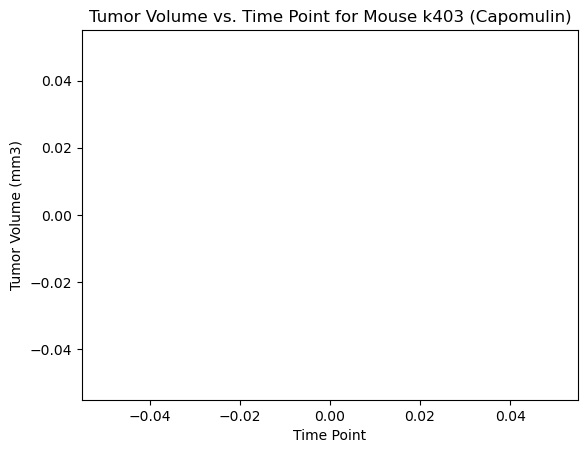

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'k403'
capomulin_data = new_mouse_study_df[(new_mouse_study_df['Drug Regimen'] == 'Capomulin') & (new_mouse_study_df['Mouse ID'] == mouse_id)]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show

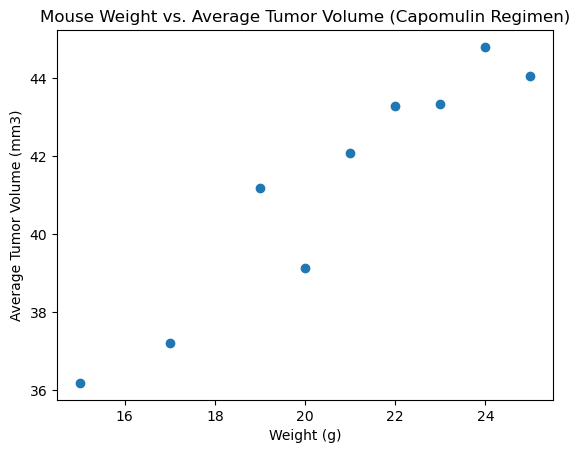

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data2 = new_mouse_study_df[new_mouse_study_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data2.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
plt.scatter(average_tumor_volume.index, average_tumor_volume, marker='o')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [74]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data3 = new_mouse_study_df[new_mouse_study_df['Drug Regimen'] == 'Capomulin']
correlation_coef, _ = stats.pearsonr(capomulin_data['Weight (g)'], capomulin_data3['Tumor Volume (mm3)'])
slope, intercept, rvalue, pvalue, stderr = stats.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", rvalue)
print("P-value:", pvalue)
print("Standard Error:", stderr)

NameError: name 'stats' is not defined